In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def OLS(y,y_hat):
    return (y - y_hat).dot(y - y_hat)
def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

In [13]:
N = 50
D= 50

In [14]:
X = np.random.randn(N,D)
X = np.column_stack((np.array([[1]*N]).T ,X))

w_True = np.array([4.7293, 1.07344, 6.90934] + [0]*48)

y = X.dot(w_True) + np.random.randn(N)

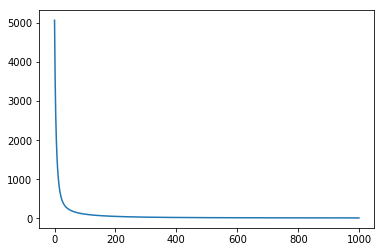

In [15]:
# with out reqularization  l1 = 0, l2 =0

w = np.random.randn(X.shape[1])

J = []

eta = 1e-3
epochs = int(1e3)

for i in range(epochs):
    y_hat = X.dot(w)
    J.append(OLS(y,y_hat))
    w -= eta*X.T.dot(y_hat - y)
    
plt.plot(J)


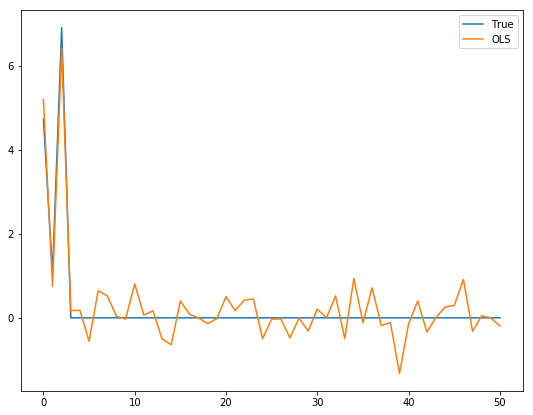

In [44]:
plt.figure(figsize= (9,7))
plt.plot(w_True, label = "True")
plt.plot(w, label = "OLS")
plt.legend()

In [26]:
np.mean(w < 0)

0.47058823529411764

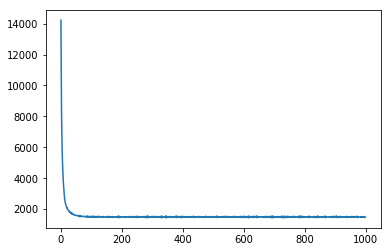

In [64]:
# with L1 regularzation  - l * sum of bas (w) 

w_l1 = np.random.randn(X.shape[1])

J = []

eta = 1e-3
l = 100
epochs = int(1e3)

for i in range (epochs):
    y_hat = X.dot(w_l1)
    J.append(OLS(y,y_hat) + l*np.sum(np.abs(w_l1)))
    w_l1 -= eta*(X.T.dot(y_hat - y)  + l*np.sign(w_l1))
    
plt.plot(J)

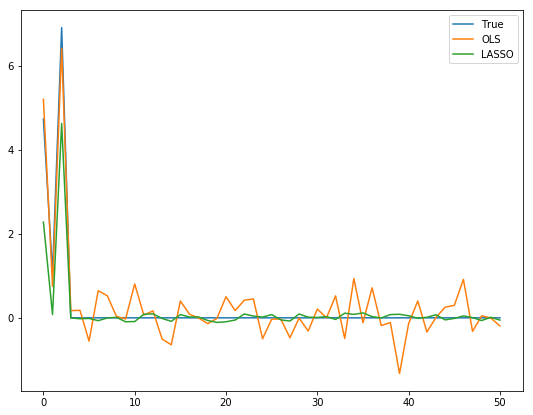

In [40]:
plt.figure(figsize= (9,7))
plt.plot(w_True, label = "True")
plt.plot(w, label = "OLS")
plt.plot(w_l1, label = "LASSO")
plt.legend()

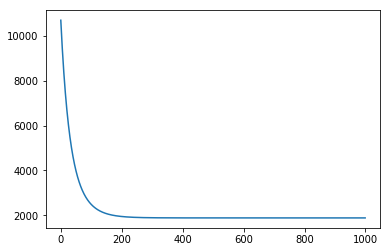

In [61]:
# L2 - Rudge Regression   - l * w^2 - l* w.T.dot(w)

w = np.random.randn(X.shape[1])
l = 100
J = []

eta = 1e-4
epochs = int(1e3)

for i in range(epochs):
    y_hat = X.dot(w)
    J.append(OLS(y,y_hat) + l*w.T.dot(w))
    w -= eta*(X.T.dot(y_hat - y) + l*w)
    
plt.plot(J)

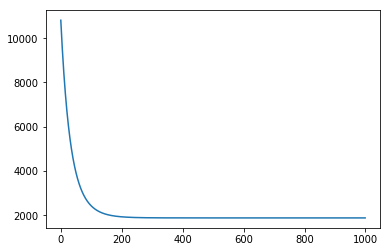

In [73]:
w = np.random.randn(X.shape[1])

J=[]

eta = 1e-4
epochs = int(1e3)
l2 = 100


for i in range ( epochs):
    y_hat = X.dot(w)
    J.append(OLS(y,y_hat) + l2*w.T.dot(w))
    w -= eta*(X.T.dot(y_hat - y) + l2*w)

#plt.figure(figsize= (12,9))

plt.plot(J)